In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
df= pd.read_csv('Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.shape

(9240, 37)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:
#Checking for duplicates

df[df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
#Checikng describe function

df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


**There seems to be imbalance in some of the columns with some outliers. Going forward will be treating these columns accordingly.**

In [9]:
#Checking describe function for object type columns.
df.describe(include=['object'])

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,ce725c59-d4d8-4340-a0f6-6990a8871ce5,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


### Data Cleaning:

 a) Handling Delimiters

In [10]:
df['Asymmetrique Activity Index'] = df['Asymmetrique Activity Index'].fillna('').str.split(".").str[1]
df['Asymmetrique Profile Index'] = df['Asymmetrique Profile Index'].fillna('').str.split(".").str[1]

In [11]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,Medium,Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,Medium,High,15.0,18.0,No,No,Modified


**b) Dropping Unnecessary columns**

In [12]:
cols = []
for i in df.columns:
    if df[i].nunique()==1:
        cols.append(i)
df.drop(cols,axis=1,inplace=True)
df.shape

(9240, 32)

In [13]:
# Dropping Prospect_ID as it is just indicative of the ID number and hence not helping the analysis

df.drop('Prospect ID',axis=1,inplace = True)

In [14]:
df.shape

(9240, 31)

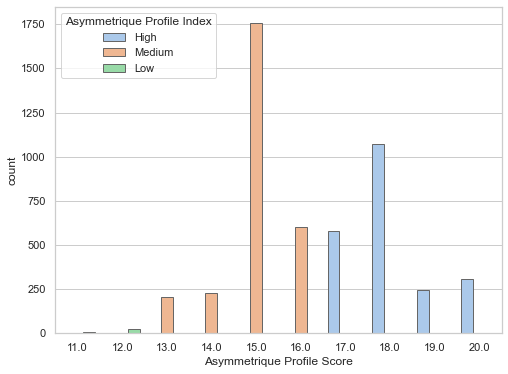

In [15]:
## Index and score assigned to each customer based on their profile
plt.figure(figsize = (8,6))
sns.countplot(x = "Asymmetrique Profile Score", hue = "Asymmetrique Profile Index", data = df, palette = "pastel",edgecolor=".4",hue_order = ['High','Medium','Low'])
plt.show()

In [16]:
df[['Asymmetrique Profile Index','Asymmetrique Profile Score']].value_counts()

Asymmetrique Profile Index  Asymmetrique Profile Score
Medium                      15.0                          1759
High                        18.0                          1071
Medium                      16.0                           599
High                        17.0                           579
                            20.0                           308
                            19.0                           245
Medium                      14.0                           226
                            13.0                           204
Low                         12.0                            22
                            11.0                             9
dtype: int64

- Leads with `Asymmetrique profile score` of 11 & 12 fall in `Low` Category.
- Leads with `Asymmetrique profile score` of 13,14,15 & 16 fall in `Medium` Category.
- Leads with `Asymmetrique profile score` of 17,18,19 & 20 fall in `High` Category.

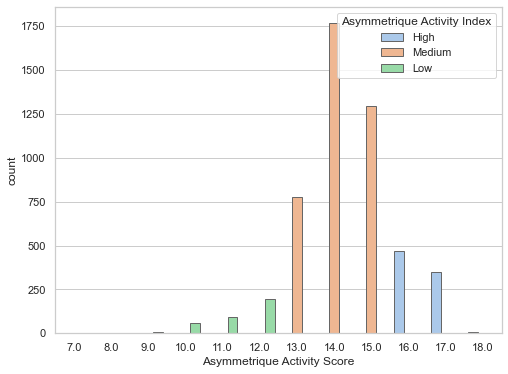

In [17]:
## Index and score assigned to each customer based on their activity
plt.figure(figsize = (8,6))
sns.countplot(x = "Asymmetrique Activity Score", hue = "Asymmetrique Activity Index", data = df, palette = "pastel",edgecolor=".4",hue_order = ['High','Medium','Low'])
plt.show()

- Leads with `Asymmetrique Activity Score` from 7 to 12 fall in the category of ` Low` Asymmetrique Activity Index.
- Leads with `Asymmetrique Activity Score` of 13,14 & 15 fall in the category of `Medium` Asymmetrique Activity Index.
- Leads with `Asymmetrique Activity Score` of 16,17 & 18 fall in the category of `High` Asymmetrique Activity Index.

From the above plot we observe that columns `'Asymmetrique Profile Score'` and `"Asymmetrique Activity Score"` are well described by columns `"Asymmetrique Profile Index"` and `"Asymmetrique Activity Index"`. Hence it is safe to remove these columns from dataset.

In [18]:
df.drop(["Asymmetrique Profile Index","Asymmetrique Activity Index"],axis = 1, inplace = True)

In [19]:
df.shape

(9240, 29)

**c) Dealing with uncertain values of columns**

In [20]:
# Columns having select values
df.columns[df.isin(['Select']).any()]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

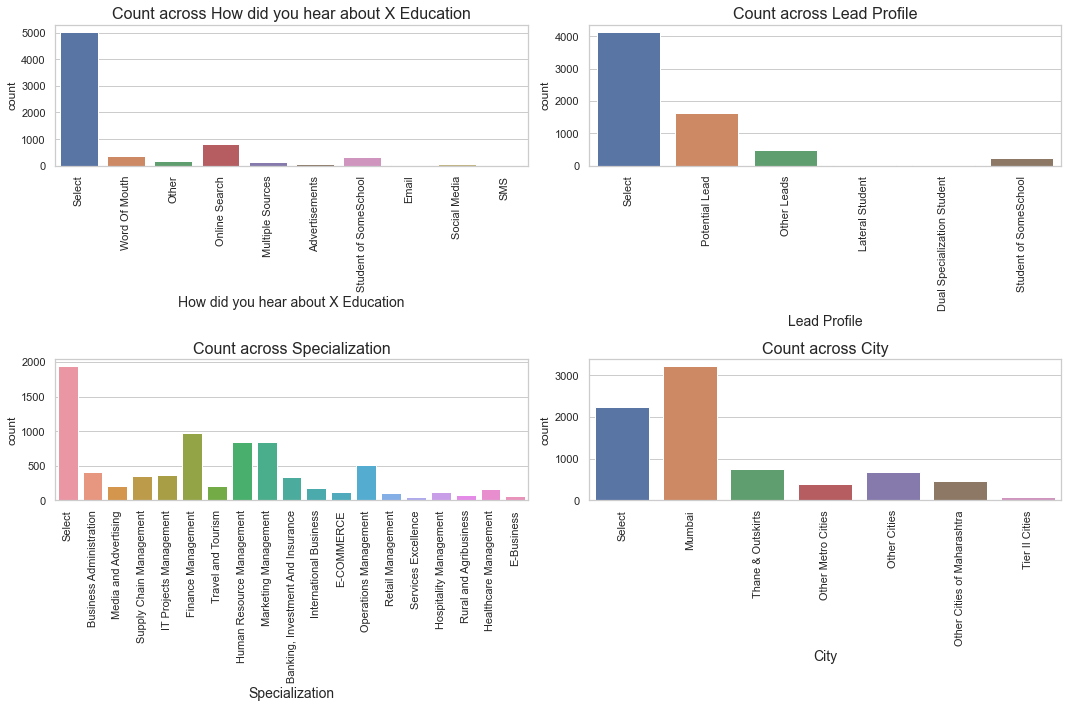

In [21]:
def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(data=df, x=x)
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(15,10))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)
countplot('City',4)

plt.tight_layout()

<a> We can see that Select category is maximum in most of the columns. We need to impute the Select value in each column.
    
    - We will be imputing Select category with NaN values.

In [22]:
df[['Specialization', 'How did you hear about X Education', 'Lead Profile','City']] = df[['Specialization', 'How did you hear about X Education', 'Lead Profile','City']].replace('Select','Unknown')

**d) Checking for missing values in each column:**

In [23]:
round((df.isnull().sum()/df.shape[0])*100,2).sort_values(ascending=False)

Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Tags                                             36.29
What matters most to you in choosing a course    29.32
Lead Profile                                     29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Lead Origi

<a>We can see that quite a few columns have more than 40% null values. Let's drop the columns with over 40% null values as it won't be helpful in describing the leads. We can handle the missing values by imputing them.

In [24]:
#Dropping columns with more than 40% of missing values
df.drop(df.loc[:,list(round((df.isnull().sum()/df.shape[0])*100,2) > 40)].columns,axis=1, inplace = True)

In [25]:
df.shape

(9240, 26)

**e) Imputing Null values**

In [26]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Converted                                         0.000000
Do Not Email                                      0.000000
Total Time Spent on Website                       0.000000
Lead Origin                                       0.000000
Do Not Call                                       0.0000

Columns having missing values:

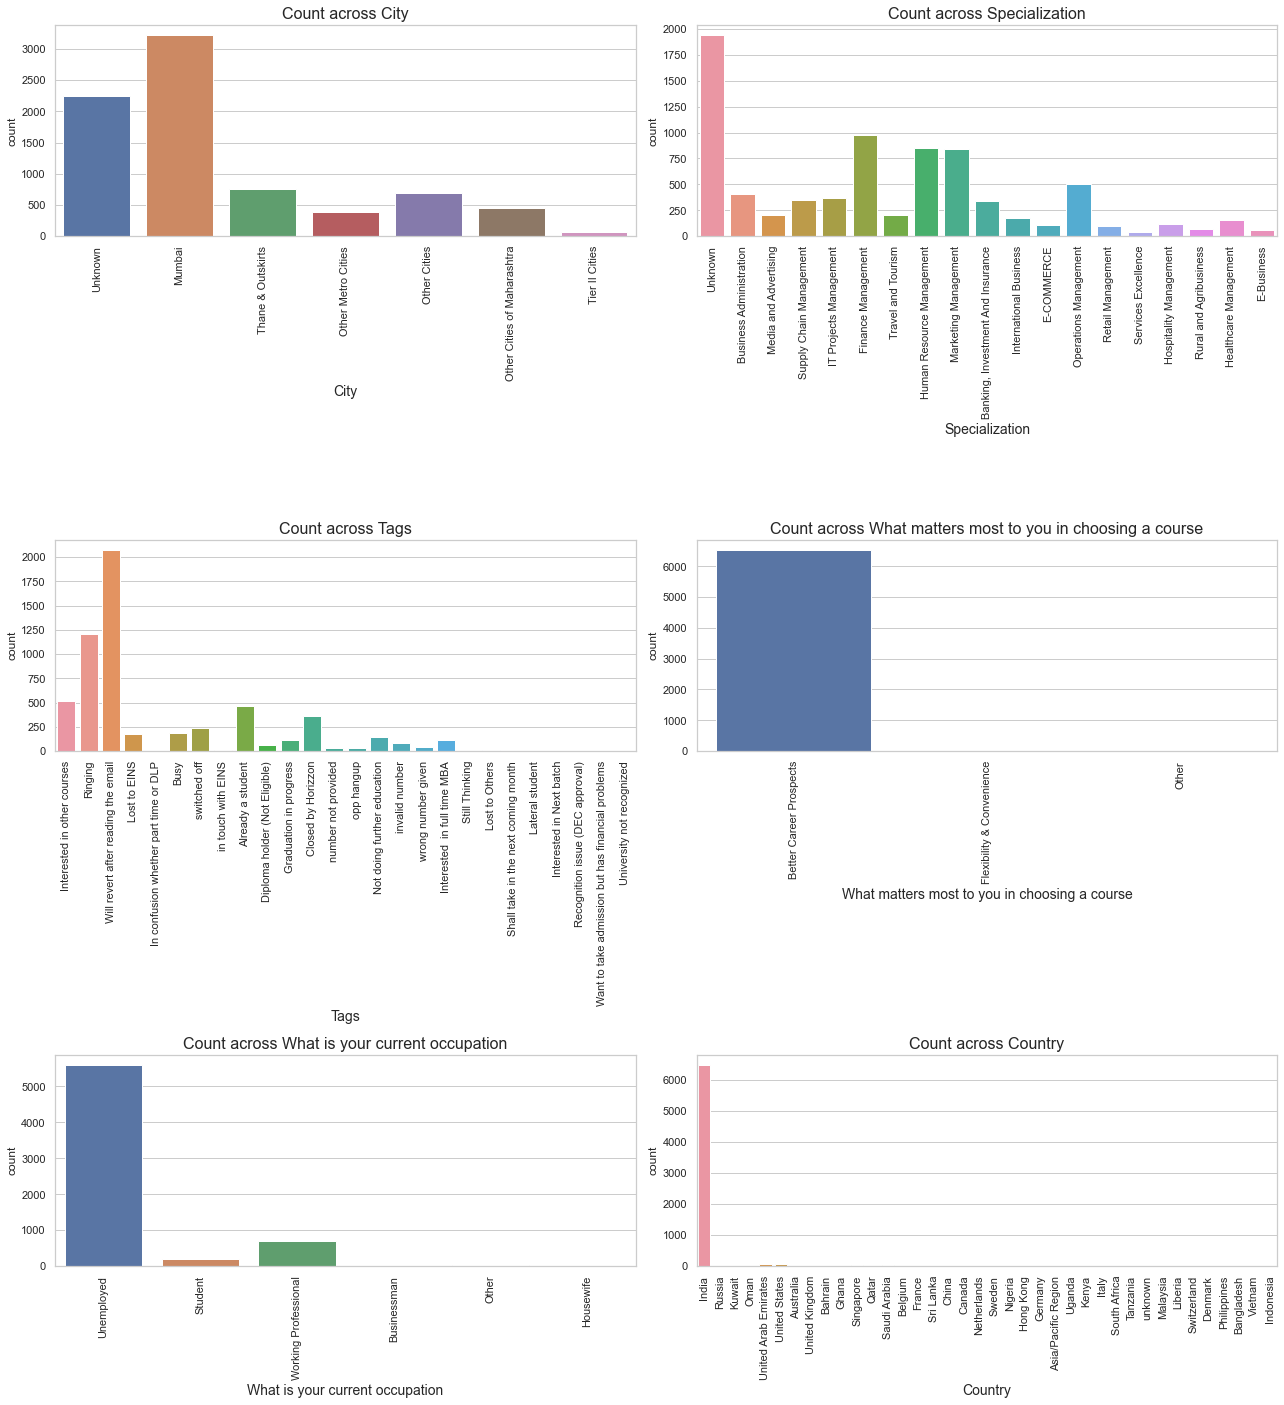

In [27]:
def countplot(x, fig):
    plt.subplot(4,2, fig)
    sns.countplot(data=df, x=x)
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 14)
    plt.xticks(rotation = 90)

plt.figure(figsize=(18,25))


countplot('City',1)
countplot('Specialization',2)
countplot('Tags',3)
countplot('What matters most to you in choosing a course',4)
countplot('What is your current occupation',5)
countplot('Country',6)


plt.tight_layout()

###  <a>**Inferences:**
<a>
        
 - From the count plot of `City`, we can see that the maximum leads are from `Mumbai`.
 - For most of the leads, having `Better Career Prospects`, matters the most while choosing a course. 
 - Maximum number of leads are currently `Unemployed` when it comes to current occupation.

 - Majority of the leads are `Specialized` in `Finance Management`, followed by Human Resource Management & Marketing Management. <br>
 - Majority of the leads are from `India`.
 - Majority of the leads are the customers tagged as -`will revert after reading the email`.

In [28]:
df['City'].value_counts(dropna=False)

Mumbai                         3222
Unknown                        2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [29]:
#Let's make a list of columns above 15% null values:
cols_above_15na = []
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])*100 >= 15:
        cols_above_15na.append(i)
cols_above_15na

['Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Profile',
 'City']

In [30]:
for i in cols_above_15na:
    print(i+':')
    print(df[i].value_counts(dropna=False))
    print("<____________________________________________>",'\n')
    

Country:
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Germany                    4
Nigeria                    4
Sweden                     3
Netherlands                2
Philippines                2
Ghana                      2
Uganda                     2
Bangladesh                 2
Belgium                    2
Asia/Pacific Region        2
Italy                      2
China                      2
Sri Lanka                  1
Liberia                    1
Denmark                    1
Malaysia                   1
Switzerland                1
Kenya

In [31]:
#Let's impute the null values for all the columns with mode
for i in cols_above_15na:
    df[i].fillna(df[i].mode()[0],inplace=True)
    
for j in cols_above_15na:
    print(j+':')
    print(df[j].value_counts(dropna=False))
    print("<____________________________________________>",'\n')

Country:
India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Asia/Pacific Region        2
Ghana                      2
Italy                      2
China                      2
Netherlands                2
Belgium                    2
Bangladesh                 2
Philippines                2
Uganda                     2
Russia                     1
Tanzania                   1
Vietnam                    1
Denmark                    1
Switzerland                1
Liberia                    1
Kenya

In [32]:
#Let's check for null values once again
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Last Notable Activity                            0.000000
A free copy of Mastering The Interview           0.000000
Lead Origin                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Arti

In [33]:
#Since there are less than 2% null values left for a few columns, we can safely go ahead and drop the rows
df = df.dropna()

df.isna().sum()

Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement          

<a>Finally we get a clean dataset with no missing values

In [34]:
df.shape

(9074, 26)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   object 
 2   Lead Source                                    9074 non-null   object 
 3   Do Not Email                                   9074 non-null   object 
 4   Do Not Call                                    9074 non-null   object 
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 

In [36]:
#Let's change data types of float into int for ease of computing
df[['TotalVisits','Page Views Per Visit']] = df[['TotalVisits','Page Views Per Visit']].astype('int64')

## <a>Data Imbalance and Outlier Treatment

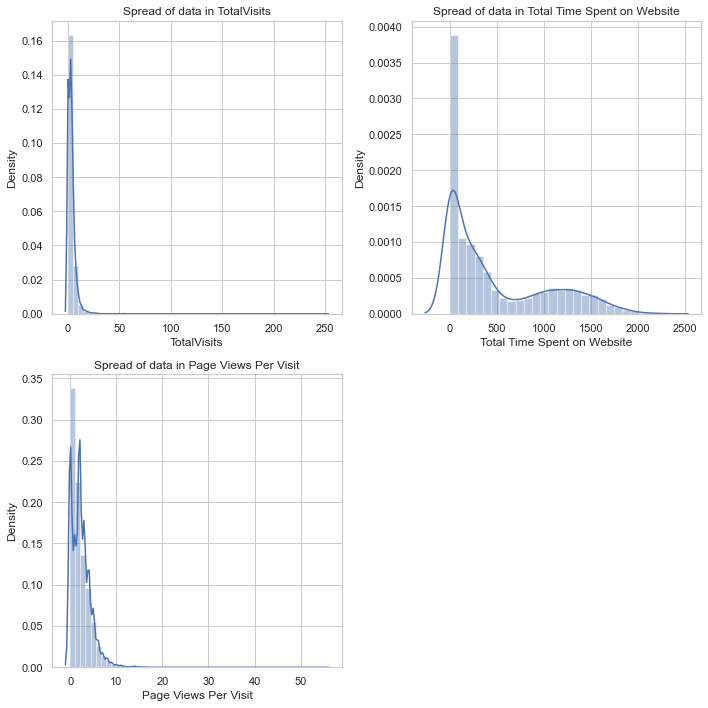

In [37]:
#Let's check the spread of numeric columns

def spread(x, fig):
    plt.subplot(2,2,fig) 
    sns.distplot(df[x])
    plt.title('Spread of data in'+' '+ x)
    plt.xlabel(x)

    
plt.figure(figsize=(10,10))

spread('TotalVisits',1)
spread('Total Time Spent on Website',2)
spread('Page Views Per Visit',3)

plt.tight_layout()

<a> We can observe that the data is skewed

In [38]:
# Let's check for data imbalance in the target column

df['Converted'].value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

<a> We can see that only 37.85% of the leads are converted. Around 62% is not converted

<a>Multivariate Analysis
    
    -Checking for correlation between data by visualizing in a heatmap


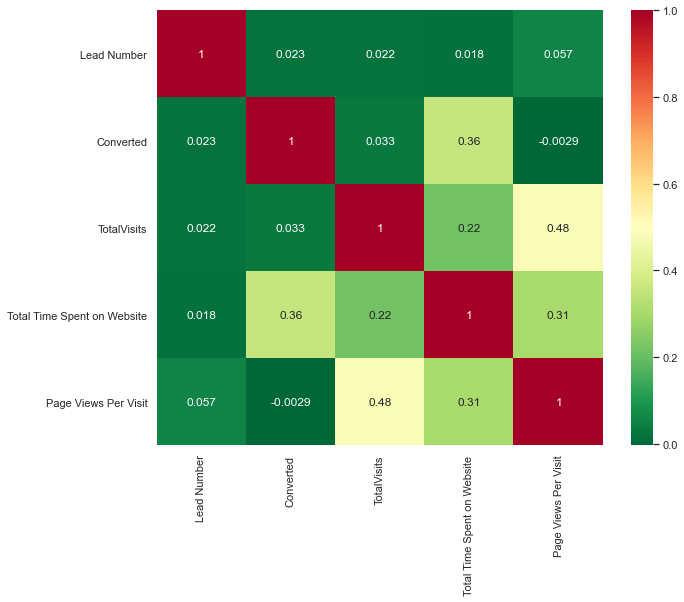

In [39]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn_r')
plt.show()

<a> Good to see that the variables are not significantly correlated to each other.

### Visualizing Categorical Columns:

In [40]:
#Let's create a list of Categorical columns to analyze

obj_cols = []
for i in df.columns:
    if df[i].dtype == 'object':
        obj_cols.append(i)
len(obj_cols)

21

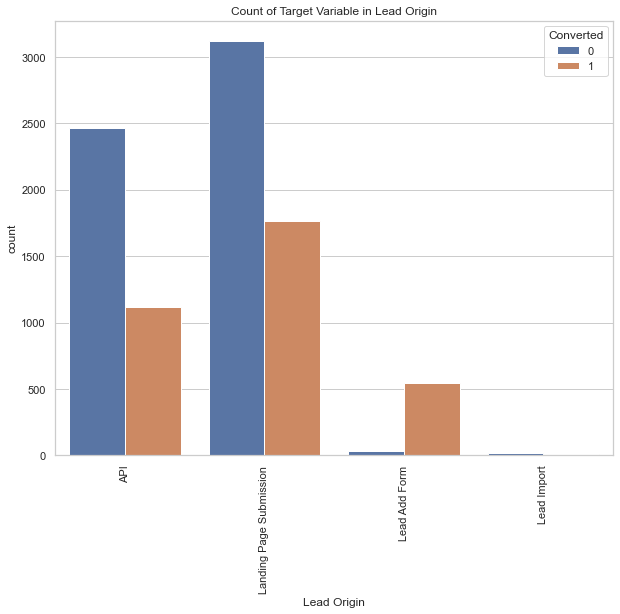

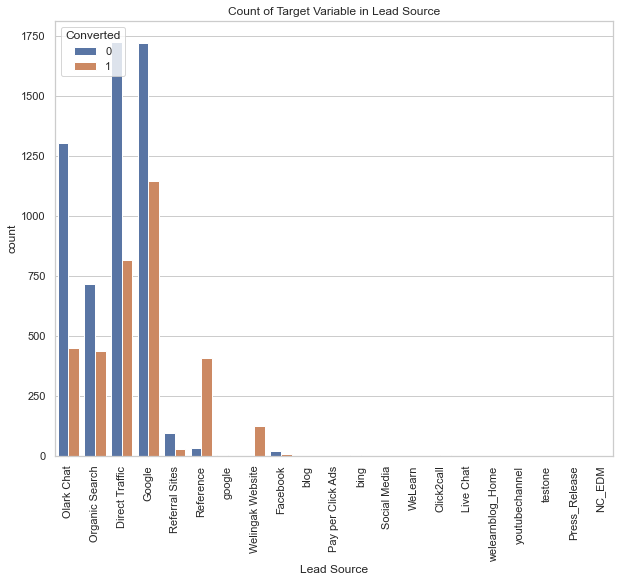

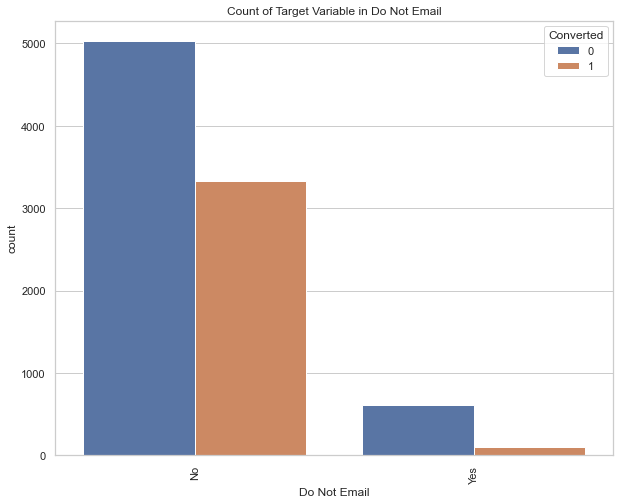

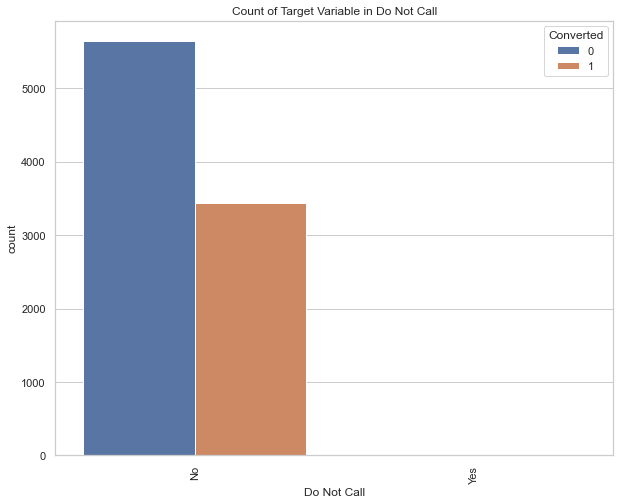

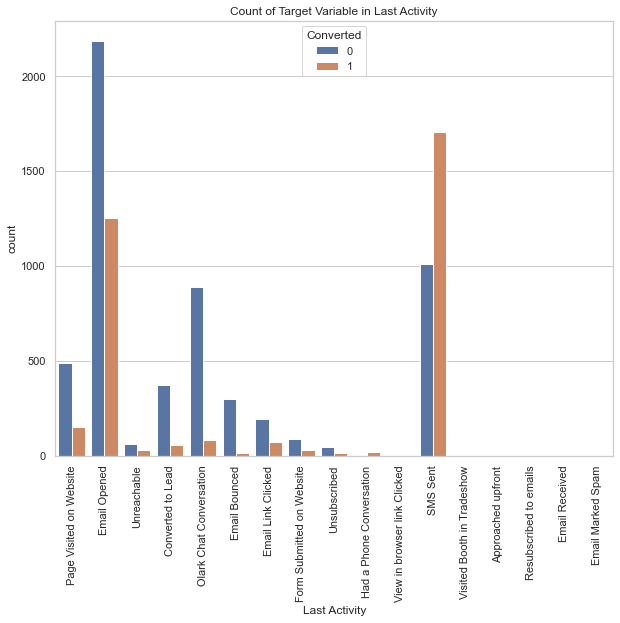

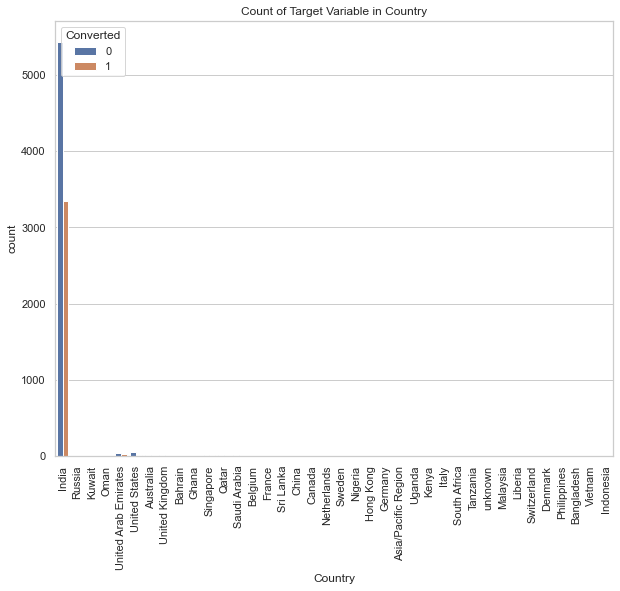

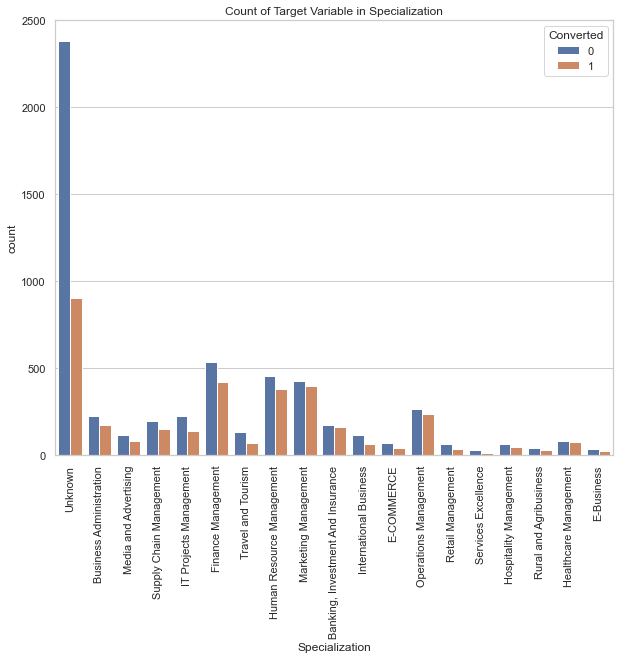

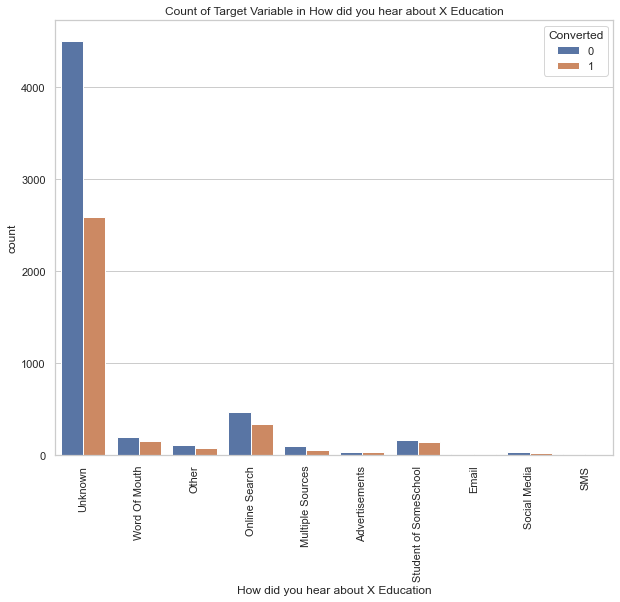

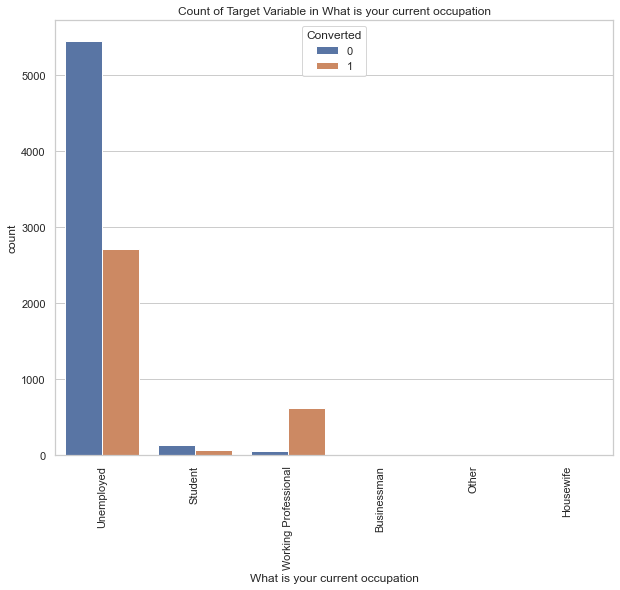

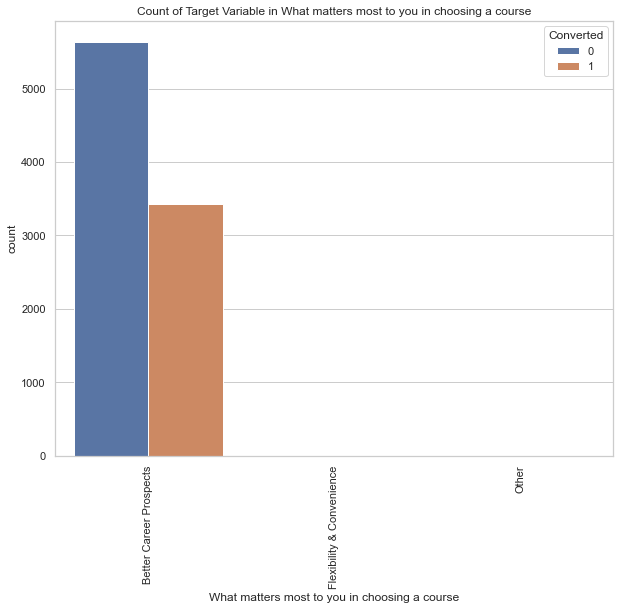

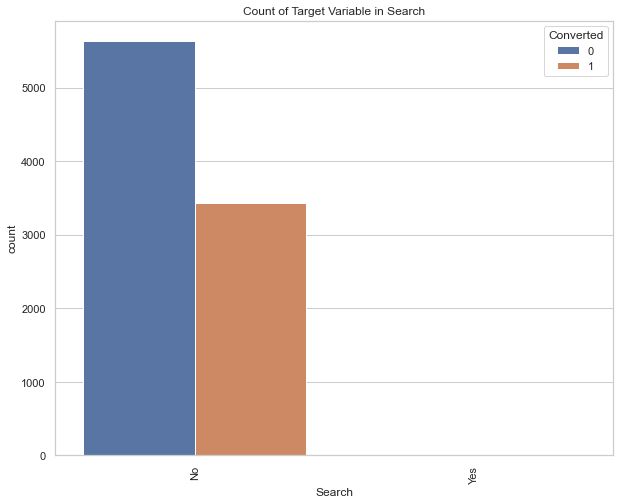

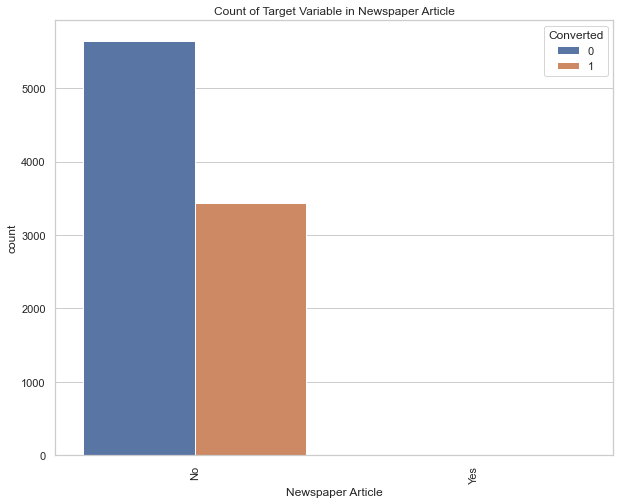

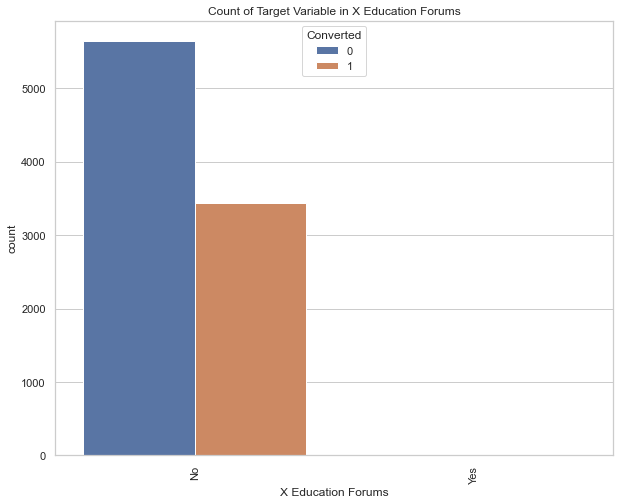

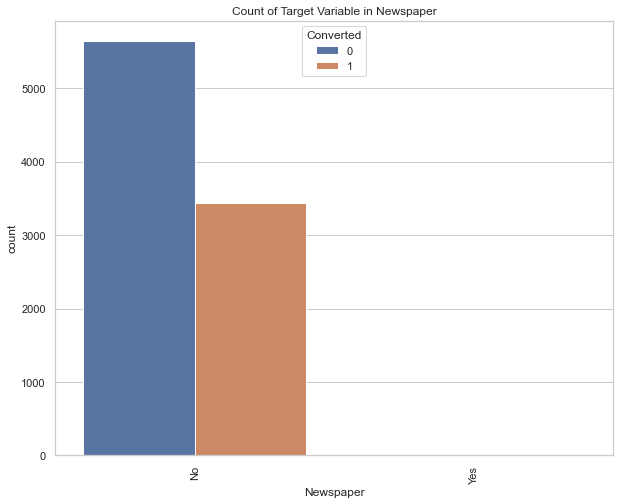

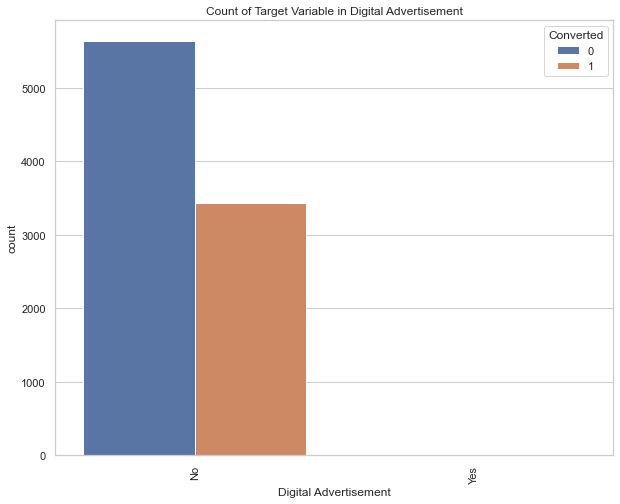

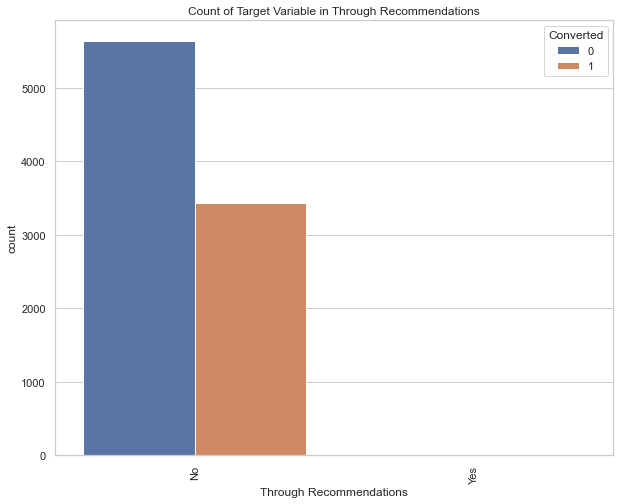

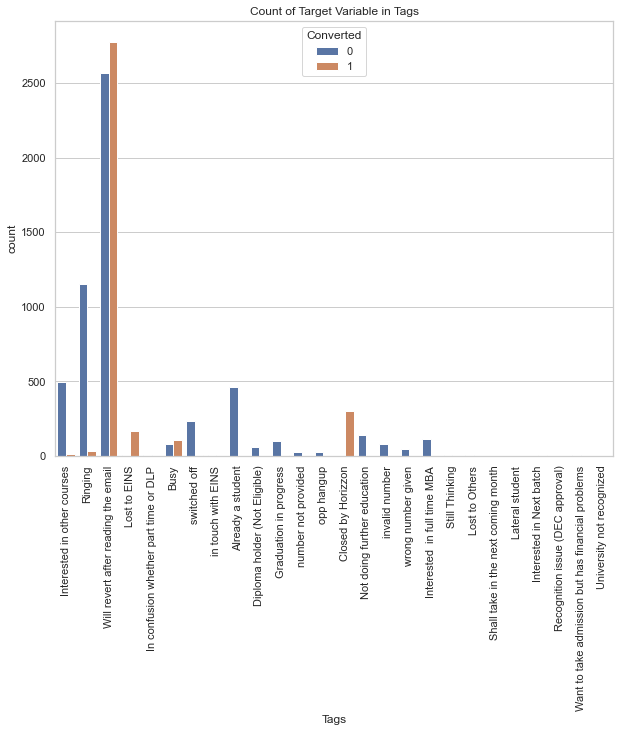

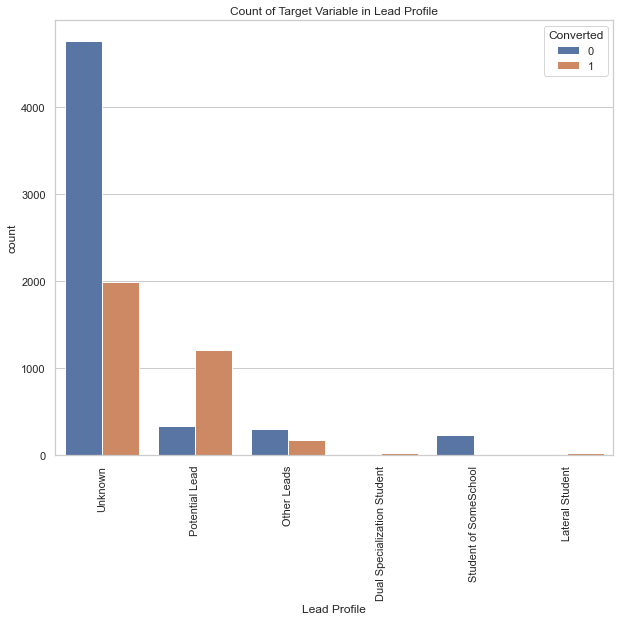

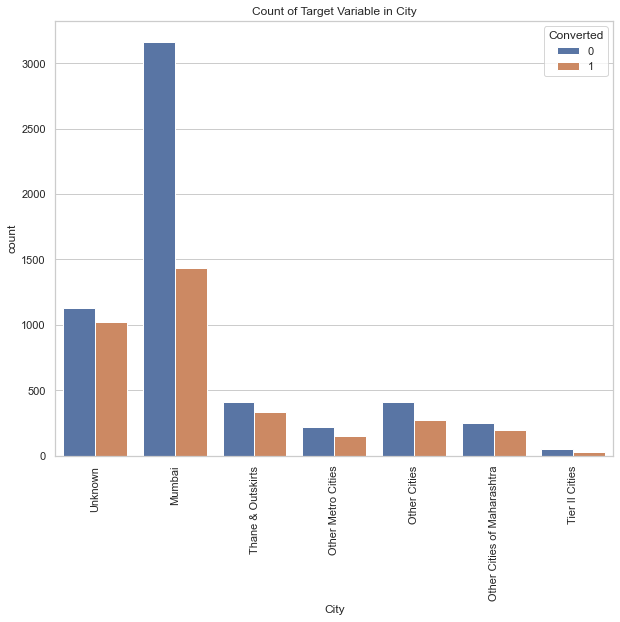

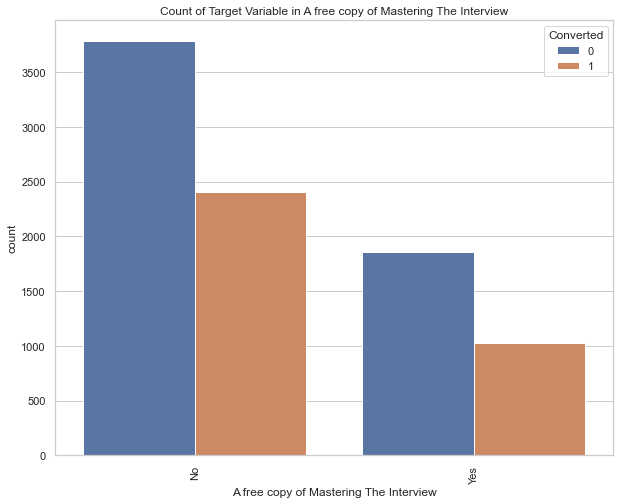

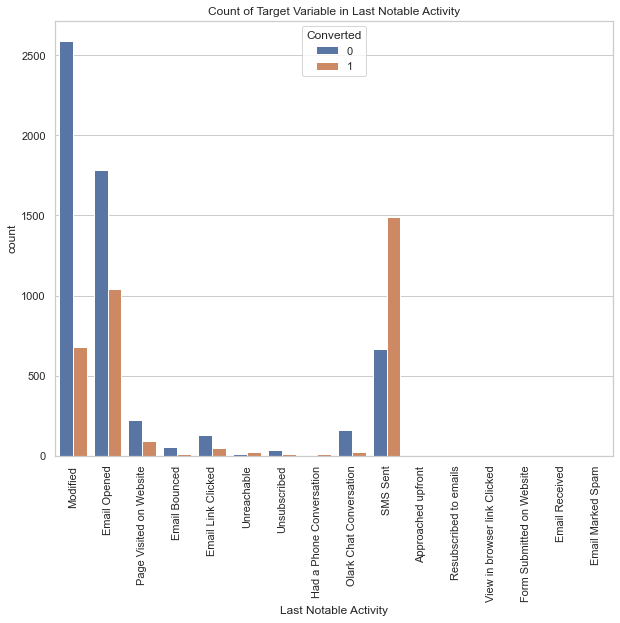

In [41]:
for i in obj_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=i,hue='Converted')
    plt.xticks(rotation=90)
    plt.title("Count of Target Variable in"+' '+i)
    plt.show()

<a> We can observe that in some of the columns there is high data imbalance with one or two categories showing any count of converted data. I have listed those columns below. It is better to drop the columns as keeping these columns can lead to biased output:
    
    1) Do Not Call
    2) Country
    3) What matters most to you in choosing a course
    4) Search
    5) Newspaper Article
    6) X Education Forums
    7) Newspaper
    8) Digital Advertisement
    9) Through Recommendations

In [42]:
#Let us create of these columns and drop them
imbalanced_cols = ['Do Not Call','Country','What matters most to you in choosing a course','Search','Newspaper Article',
                   'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations']

df.drop(imbalanced_cols,axis=1,inplace = True)
df.shape

(9074, 17)

**<b>Analyzing Numerical Columns**

**a) Outlier Analysis**

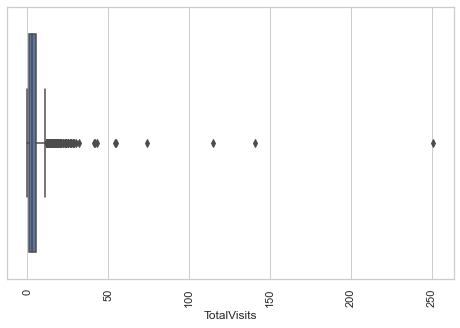

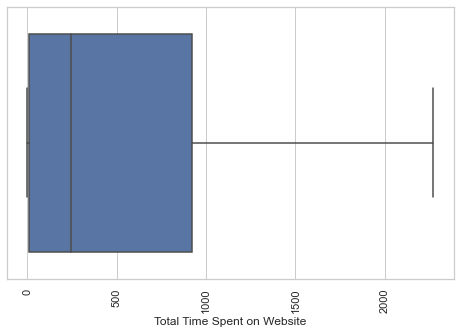

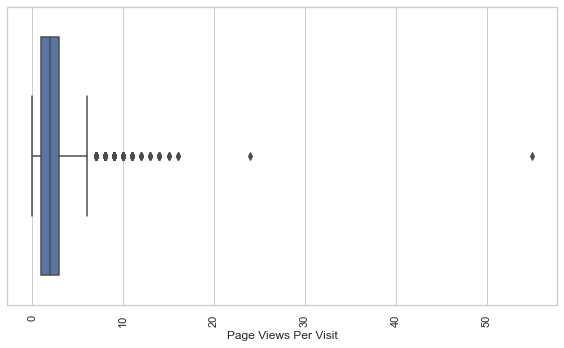

In [43]:
for i in df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df,x=i)
    plt.xticks(rotation=90)
    
plt.tight_layout()

<b> We can see that outliers are present in TotaVisits and Page Views Per Visit. Let's analyze  

In [44]:
df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.90,0.95,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.300749
std,4.858802,545.256560,2.165536
min,0.000000,0.000000,0.000000
1%,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.000000
90%,7.000000,1373.000000,5.000000


<a> We can see in `Total Visits` and `Page Views Per Visit` there is an abnormal spike in data after 99 percentile but a smooth progression untill 99 percentile. Hence we can cap the data at 99 percentile.

In [45]:
#Capping the data by removing outliers
Q1 = df['TotalVisits'].quantile(0.01)
Q3 = df['TotalVisits'].quantile(0.99)
df = df.loc[(df['TotalVisits'] >= Q1) & (df['TotalVisits'] <= Q3)]

Q1 = df['Page Views Per Visit'].quantile(0.01)
Q3 = df['Page Views Per Visit'].quantile(0.99)
df = df.loc[(df['Page Views Per Visit'] >= Q1) & (df['Page Views Per Visit'] <= Q3)]

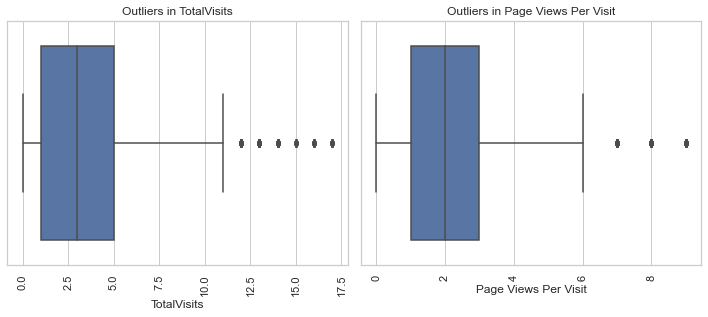

In [46]:
# After treating the outliers
def boxplot(x,fig):
    plt.subplot(2,2,fig)
    sns.boxplot(x=x, data=df)
    plt.title("Outliers in"+" "+x)
    plt.xticks(rotation=90)

plt.figure(figsize=(10,8))

boxplot('TotalVisits',1)
boxplot('Page Views Per Visit',2)

plt.tight_layout()

In [47]:
df.shape

(8924, 17)

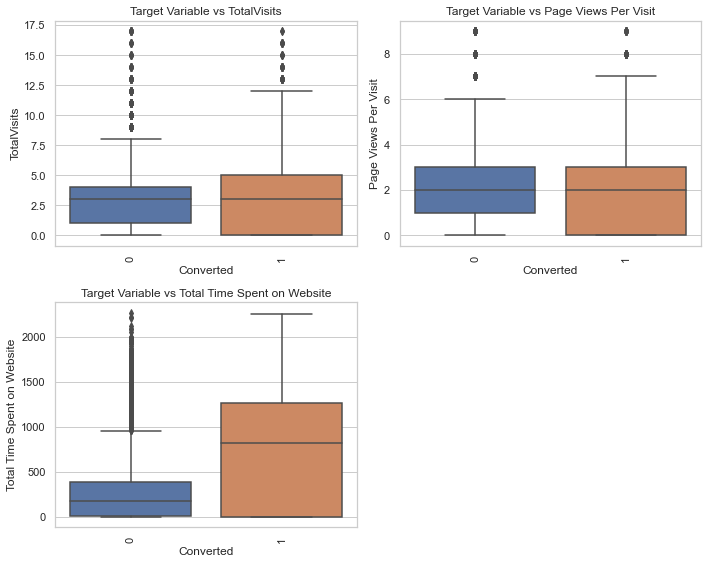

In [48]:
def boxplot(y, fig):
    plt.subplot(2,2,fig)
    sns.boxplot(x="Converted",y=y,data=df)
    plt.title("Target Variable vs"+" "+y)
    plt.xlabel("Converted")
    plt.xticks(rotation=90)
    
plt.figure(figsize=(10,8))

boxplot('TotalVisits',1)
boxplot('Page Views Per Visit',2)
boxplot('Total Time Spent on Website',3)

plt.tight_layout()

<a> Inferences:<br>
    1) Total Visits on website is more in case of the leads that are converted.
    2) Page Views per visit medians are similar for both cases, hence nothing can be infered.
    3) Total Time spent on Website is also more in case of converted leads.

## Data Preparation:

In [49]:
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,Unknown,Unknown,No,Modified
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,Unknown,Unknown,Unemployed,Ringing,Unknown,Unknown,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Unknown,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Unknown,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Unknown,Other,Unemployed,Will revert after reading the email,Unknown,Mumbai,No,Modified


In [50]:
# Copying the dataset 
df_new = df.copy()

#Converting Binary Variables yes/no to 0 or 1
def binary_map(x):
    return x.map({'Yes':1,"No":0})

In [51]:
df_new[["Do Not Email","A free copy of Mastering The Interview"]] = df_new[["Do Not Email","A free copy of Mastering The Interview"]].apply(binary_map)

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8924 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Lead Number                             8924 non-null   int64 
 1   Lead Origin                             8924 non-null   object
 2   Lead Source                             8924 non-null   object
 3   Do Not Email                            8924 non-null   int64 
 4   Converted                               8924 non-null   int64 
 5   TotalVisits                             8924 non-null   int64 
 6   Total Time Spent on Website             8924 non-null   int64 
 7   Page Views Per Visit                    8924 non-null   int64 
 8   Last Activity                           8924 non-null   object
 9   Specialization                          8924 non-null   object
 10  How did you hear about X Education      8924 non-null   object
 11  What

In [53]:
#Creating Dummy Variables for the categorical variables
obj_cols_new = [i for i in df_new.columns if (df_new[i].dtype == 'object') and (len(df_new[i].value_counts()) > 2) and (i not in ['Specialization','How did you hear about X Education','Lead Profile','City'])]

dummies = pd.get_dummies(df[obj_cols_new],drop_first = True)
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0,0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,Unknown,Unknown,0,Modified
1,660728,API,Organic Search,0,0,5,674,2,Email Opened,Unknown,Unknown,Unemployed,Ringing,Unknown,Unknown,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2,1532,2,Email Opened,Business Administration,Unknown,Student,Will revert after reading the email,Potential Lead,Mumbai,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1,305,1,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Unknown,Mumbai,0,Modified
4,660681,Landing Page Submission,Google,0,1,2,1428,1,Converted to Lead,Unknown,Other,Unemployed,Will revert after reading the email,Unknown,Mumbai,0,Modified


In [54]:
df_new = pd.concat([df_new,dummies],axis=1)
df_new.shape

(8924, 101)

In [55]:
# Creating dummy variable separately for the variables 'Specialization','How did you hear about X Education','City' 
# since they have the levels 'Select' 
# dropping that level by specifying it explicitly

dummy_spl = pd.get_dummies(df_new[['Specialization','How did you hear about X Education','City']], 
                           prefix = ['Specialization','How did you hear about X Education','City'])

df_new = pd.concat([df_new,dummy_spl], axis = 1)
df_new.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Unknown,H

In [56]:
df_new.drop(obj_cols_new,axis=1, inplace = True)
df_new.drop(['Specialization',"How did you hear about X Education","City",'Specialization_Unknown', 'How did you hear about X Education_Unknown','City_Unknown'],axis = 1, inplace = True)
df_new.shape

(8924, 125)

In [57]:
# I think lead_number variable does not hold importance in the analysis. Hence I will drop the column
# I will also drop Lead_profile since it has too many Unknown values
df_new.drop(['Lead Number','Lead Profile'],axis = 1,inplace = True)

df_new.shape

(8924, 123)

In [58]:
df_new.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### Splitting the data into Train and Test set:

In [59]:
# Creating X and y variables
y = df_new["Converted"]
X = df_new.drop('Converted',axis=1)

In [60]:
# Splitting the data into Train and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.7, test_size=0.3, random_state = 100)
#I have taken 70% as train data and 30% as test data

In [61]:
# Let's check the shape
print("X_train shape:", X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (6246, 122)
y_train shape: (6246,)


### Scaling the Data:

In [62]:
# I will be using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creating object for MinMaxScaler
scaler = MinMaxScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,How did you hear about X Education_Advertisements,How did you hear about X Education_Email,How did you hear about X Education_Multiple Sources,How did you hear about X Education_Online Search,How did you hear about X Education_Other,How did you hear about X Education_SMS,How did you hear about X Education_Social Media,How did you hear about X Education_Student of SomeSchool,How did you hear about X Education_Word Of Mouth,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
6676,0,0.176471,0.548856,0.333333,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## Model Building

**Running first training model**

In [63]:
# Now let's build a logistic regression model
from sklearn.linear_model import LogisticRegression

# Creating an object for Logistic Regression
logreg = LogisticRegression()

In [64]:
# I will RFE as automated Feature Selection method and select 15 variables

# Importing RFE
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
# Let's take a look at which features have been selected by RFE.

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 22),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 21),
 ('A free copy of Mastering The Interview', False, 88),
 ('Lead Origin_Landing Page Submission', False, 55),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 13),
 ('Lead Source_Direct Traffic', False, 70),
 ('Lead Source_Facebook', False, 99),
 ('Lead Source_Google', False, 74),
 ('Lead Source_Live Chat', False, 96),
 ('Lead Source_NC_EDM', False, 104),
 ('Lead Source_Olark Chat', False, 32),
 ('Lead Source_Organic Search', False, 75),
 ('Lead Source_Pay per Click Ads', False, 100),
 ('Lead Source_Press_Release', False, 103),
 ('Lead Source_Reference', False, 24),
 ('Lead Source_Referral Sites', False, 73),
 ('Lead Source_Social Media', False, 106),
 ('Lead Source_WeLearn', False, 87),
 ('Lead Source_Welingak Website', False, 23),
 ('Lead Source_bing', False, 85),
 ('Lead Source_blog', False, 63),
 ('Lead Source_google', 

In [66]:
# Creating a list of selected variables by RFE

cols = X_train.columns[rfe.support_]

#Let's look at the selected columns
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_switched off', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [67]:
# Assigning only the columns selected by RFE to X_train
X_train = X_train[cols]

In [68]:
# Importing StatsModels

import statsmodels.api as sm

In [69]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6230
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1708.8
Date:                Sun, 28 Jul 2024   Deviance:                       3417.6
Time:                        03:38:55   Pearson chi2:                 9.44e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1154      0.233    -21.993      0.000      -5.571      -4.660
Do Not Email                                            -1.7248      0.201     -8.567      0.000      -2.119      -1.330
Total Time Spent on Website                              4.1369      0.191     21.676      0.000       3.763       4.511
Lead Origin_Lead Add Form                                3.4411      0.265     12.989      0.000       2.922       3.960
Last Activity_Converted to Lead                         -1.4125      0.270     -5.233      0.000      -1.942      -0.883
Last Activity_Had a Phone Conversation                   3.5217      1.407      2.503      0.012       0.764       6.280
Last Activity_Olark Chat Conversation                   -1.3806      0.182     -7.583      0.000      -1.737      -1.024
What is your current occupation_Working Professional     2.8046      0.258     10.863      0.000       2.299       3.311
Tags_Busy                                                3.3020      0.316     10.442      0.000       2.682       3.922
Tags_Closed by Horizzon                                  7.8819      0.759     10.384      0.000       6.394       9.370
Tags_Lost to EINS                                        7.7089      0.577     13.361      0.000       6.578       8.840
Tags_Ringing                                            -1.3155      0.331     -3.976      0.000      -1.964      -0.667
Tags_Will revert after reading the email                 3.6950      0.223     16.558      0.000       3.258       4.132
Tags_in touch with EINS                                  3.3681      0.866      3.890      0.000       1.671       5.065
Tags_switched off                                       -1.5525      0.757     -2.050      0.040      -3.037      -0.068
Last Notable Activity_SMS Sent                           2.4574      0.118     20.846      0.000       2.226       2.688
========================================================================================================================
"""

<a> There is not a single column that has a p-value of above 0.05. Looks like we are on the right track.

**<a>Let's look at the VIF or Variance_Inflation_Factor to check for correlation between independant variables**

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [71]:
# Let's make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,2.13
1,Total Time Spent on Website,1.88
14,Last Notable Activity_SMS Sent,1.54
2,Lead Origin_Lead Add Form,1.30
8,Tags_Closed by Horizzon,1.22
6,What is your current occupation_Working Profes...,1.17
10,Tags_Ringing,1.15
5,Last Activity_Olark Chat Conversation,1.14
0,Do Not Email,1.06
7,Tags_Busy,1.06


**We can see, not a single column has a vif greater than 5. Good news again!**

<a> Let's drop `Tags_switched off` and refit the model as it has the highest p-value, although within the acceptable range

In [72]:
X_train.drop('Tags_switched off', axis = 1, inplace = True)

In [73]:
# Let's refit the model 
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6246
Model:                            GLM   Df Residuals:                     6231
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1711.9
Date:                Sun, 28 Jul 2024   Deviance:                       3423.7
Time:                        03:38:55   Pearson chi2:                 8.97e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.3427      0.224    -23.861      0.000      -5.782      -4.904
Do Not Email                                            -1.7287      0.201     -8.605      0.000      -2.122      -1.335
Total Time Spent on Website                              4.1426      0.191     21.715      0.000       3.769       4.516
Lead Origin_Lead Add Form                                3.4641      0.266     13.020      0.000       2.943       3.986
Last Activity_Converted to Lead                         -1.4124      0.271     -5.216      0.000      -1.943      -0.882
Last Activity_Had a Phone Conversation                   3.6132      1.456      2.482      0.013       0.760       6.466
Last Activity_Olark Chat Conversation                   -1.3801      0.182     -7.572      0.000      -1.737      -1.023
What is your current occupation_Working Professional     2.8327      0.260     10.901      0.000       2.323       3.342
Tags_Busy                                                3.5381      0.308     11.496      0.000       2.935       4.141
Tags_Closed by Horizzon                                  8.1060      0.757     10.714      0.000       6.623       9.589
Tags_Lost to EINS                                        7.9353      0.574     13.833      0.000       6.811       9.060
Tags_Ringing                                            -1.0726      0.321     -3.340      0.001      -1.702      -0.443
Tags_Will revert after reading the email                 3.9244      0.213     18.414      0.000       3.507       4.342
Tags_in touch with EINS                                  3.5948      0.863      4.164      0.000       1.903       5.287
Last Notable Activity_SMS Sent                           2.4306      0.117     20.853      0.000       2.202       2.659
========================================================================================================================
"""

In [74]:
# Let's check the Vifs again

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
11,Tags_Will revert after reading the email,2.10
1,Total Time Spent on Website,1.86
13,Last Notable Activity_SMS Sent,1.52
2,Lead Origin_Lead Add Form,1.30
8,Tags_Closed by Horizzon,1.22
6,What is your current occupation_Working Profes...,1.17
10,Tags_Ringing,1.15
5,Last Activity_Olark Chat Conversation,1.14
7,Tags_Busy,1.06
0,Do Not Email,1.05


<a> There is not much difference seen in either the p-values or vif. We will go ahead with the above set of features.

## Model Evaluation:

Let's go ahead and make predictions with these final set of features

In [75]:
# Let's predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[0:10]

6676    0.700615
6138    0.925725
8650    0.968877
3423    0.057275
6552    0.194609
1696    0.111453
2110    0.983257
6830    0.079872
2581    0.027937
5927    0.212915
dtype: float64

In [76]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70061496, 0.92572515, 0.96887694, 0.05727463, 0.19460876,
       0.11145332, 0.98325711, 0.07987207, 0.02793725, 0.21291453])

**Let's create a dataframe with the actual conversion flag and the predicted probabilities**

In [77]:
y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values 
y_train_pred_final['Conversion_Prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob
0,6676,1,0.700615
1,6138,1,0.925725
2,8650,1,0.968877
3,3423,0,0.057275
4,6552,0,0.194609


**Let's also create new column 'Predicted' with 1 if Paid_prob > 0.5 else 0**

In [78]:
y_train_pred_final['Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x:1 if x>0.5 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob,Predicted
0,6676,1,0.700615,1
1,6138,1,0.925725,1
2,8650,1,0.968877,1
3,3423,0,0.057275,0
4,6552,0,0.194609,0


<a> Now we have the probabilities and have also made conversion predictions using them, it's time to evaluate the model.

In [79]:
from sklearn import metrics

In [80]:
# Creating a Confusion Matrix

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
confusion

array([[3619,  252],
       [ 370, 2005]], dtype=int64)

**Let's check the accuracy of the model**

In [81]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9004162664105028


<a> Wow! Getting a 90% accuracy. Let's cross-check this with the other metrics as well

In [82]:
# Let's evaluate the other metrics

TP = confusion[1,1] #true positive
TN = confusion[0,0] #true negative
FP = confusion[0,1] #false positive
FN = confusion[1,0] #false negative

In [83]:
# Let's calculate the Sensitivity/Recall

print(TP/(TP + FN))

0.8442105263157895


In [84]:
# Let's calculate specificity

print(TN/(TN+FP))

0.9349005424954792


In [85]:
# Let's also calculate Precision 

precision = TP/(TP+FP)
print(precision)

0.8883473637571998


### <br>There's a food for thought here, Is 0.5 a perfect cutoff that we chose randomly? Is there a way to find out the perfect cutoff? Let's find out!

**<a>Finding the optimal cutoff**

In [86]:
# Let's plot an ROC curve to see what AUC we get

# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [87]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

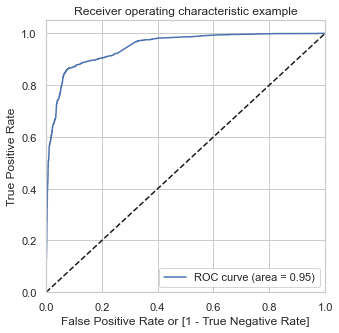

In [88]:
# We will use matplotlib to plot the ROC Curve

# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under the ROC curve is 0.95 which is great. We seem to have a good model. Let's also check the sensitivity and specificity trade-off to find out the optimal cutoff point.

In [89]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,6676,1,0.700615,1,1,1,1,1,1,1,1,1,0,0
1,6138,1,0.925725,1,1,1,1,1,1,1,1,1,1,1
2,8650,1,0.968877,1,1,1,1,1,1,1,1,1,1,1
3,3423,0,0.057275,0,1,0,0,0,0,0,0,0,0,0
4,6552,0,0.194609,0,1,1,0,0,0,0,0,0,0,0


In [90]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380243  1.000000  0.000000
0.1   0.1  0.771694  0.974737  0.647120
0.2   0.2  0.817963  0.920842  0.754844
0.3   0.3  0.877362  0.886316  0.871868
0.4   0.4  0.899296  0.863579  0.921209
0.5   0.5  0.900416  0.844211  0.934901
0.6   0.6  0.891130  0.806316  0.943167
0.7   0.7  0.876081  0.749053  0.954017
0.8   0.8  0.841819  0.618105  0.979075
0.9   0.9  0.806276  0.503579  0.991992


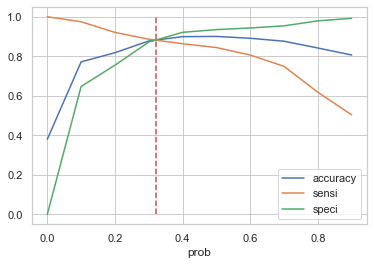

In [91]:
# Let's plot the intersection of accuracy, sensitivity and specificity

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.32,ymax=1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

As we can see around 0.32, we get the optimal values of the three metrics. So let's choose 0.36 as the cutoff and check

In [92]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x:1 if x>0.32 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,6676,1,0.700615,1,1,1,1,1,1,1,1,1,0,0,1
1,6138,1,0.925725,1,1,1,1,1,1,1,1,1,1,1,1
2,8650,1,0.968877,1,1,1,1,1,1,1,1,1,1,1,1
3,3423,0,0.057275,0,1,0,0,0,0,0,0,0,0,0,0
4,6552,0,0.194609,0,1,1,0,0,0,0,0,0,0,0,0


In [93]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.8844060198527057

**We can see that the accuracy decreases to 88.44%. Interesting!**

In [94]:
# Let's create the confuion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion2

array([[3436,  435],
       [ 287, 2088]], dtype=int64)

In [95]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [96]:
#Let's Calculate Sensitivity
TP / float(TP+FN)

0.8791578947368421

In [97]:
#Let's calculate specificity
TN / float(TN+FP)

0.8876259364505296

In [98]:
#Let's calculate Precision
TP / float(TP+FP)

0.8275862068965517

### Precision and Recall Tradeoff

In [99]:
# Let's import precision_recall curve
from sklearn.metrics import precision_recall_curve

In [100]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

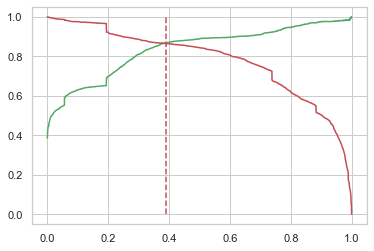

In [101]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.39,ymax=1.0,ymin=0.0,color='r',linestyle='--')
plt.show()

<a> We are having 0.39 as the optimal cutoff. Let's use this in checking accuracy

In [102]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Conversion_Prob'].map(lambda x:1 if x>0.39 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,6676,1,0.700615,1,1,1,1,1,1,1,1,1,0,0,1
1,6138,1,0.925725,1,1,1,1,1,1,1,1,1,1,1,1
2,8650,1,0.968877,1,1,1,1,1,1,1,1,1,1,1,1
3,3423,0,0.057275,0,1,0,0,0,0,0,0,0,0,0,0
4,6552,0,0.194609,0,1,1,0,0,0,0,0,0,0,0,0


In [103]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)

0.898975344220301

**We can see that the our accuracy score increase again to almost 90%. Hence we will be using 0.39 as our final cutoff to make predictions on test set**

In [104]:
# Let's create confusion matrix once again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted)
confusion3

array([[3561,  310],
       [ 321, 2054]], dtype=int64)

In [105]:
TP = confusion3[1,1] # true positive 
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [106]:
#Let's Calculate Sensitivity/Recall
TP / float(TP+FN)

0.8648421052631579

In [107]:
#Let's calculate specificity
TN / float(TN+FP)

0.9199173340222164

In [108]:
#Let's calculate Precision
TP / float(TP+FP)

0.8688663282571912

In [109]:
# let's print a report on the confusion matrix stats and visualize it
from sklearn.metrics import classification_report

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3871
           1       0.87      0.86      0.87      2375

    accuracy                           0.90      6246
   macro avg       0.89      0.89      0.89      6246
weighted avg       0.90      0.90      0.90      6246



## Making predictions on Test Set

In [110]:
# Scaling the test set using just transform

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [111]:
# Selecting the columns selected by RFE for X_test as well

X_test = X_test[cols]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_switched off,Last Notable Activity_SMS Sent
7625,0,0.713468,0,0,0,0,0,0,0,0,0,0,0,0,0
5207,0,0.390405,0,0,0,0,0,0,0,0,0,1,0,0,0
2390,0,0.000000,1,0,0,0,0,0,0,0,0,1,0,0,1
4362,0,0.102113,0,0,0,0,0,0,0,0,1,0,0,0,1
1023,0,0.139525,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
# Adding constant to X_test

X_test_sm = sm.add_constant(X_test)

In [113]:
# Dropping the same columns as we dropped in case of X_train to fine-tune the model

X_test_sm.drop("Tags_switched off",axis = 1,inplace = True)

In [114]:
#Let's make predictions in the test_set and store it in a variable

y_test_pred = res.predict(sm.add_constant(X_test))
y_test_pred[:10]

7625    0.103047
5207    0.548530
2390    0.988773
4362    0.027893
1023    0.010580
8226    0.716036
3079    0.313663
530     0.011370
7873    0.057275
5146    0.953465
dtype: float64

In [127]:
# We will convert y_test_pred into a dataframe
y_test_pred_final = pd.DataFrame()
y_test_pred_final['Lead ID'] = y_test.index
y_test_pred_final['Converted'] = y_test.values
y_test_pred_final['Conversion_Prob'] = y_test_pred
y_test_pred_final.head()

,Lead ID,Converted,Conversion_Prob
0,7625,0,0.103047
1,5207,1,0.548530
2,2390,1,0.988773
3,4362,0,0.027893
4,1023,0,0.010580


**We will be using 0.39 as our cutoff as we have got in Precision-Recall Trade-off in train set**

In [128]:
# Making predictions in the test_set using 0.39 as the cutoff
y_test_pred_final['Final_Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.39 else 0)

y_test_pred_final.head()

,Lead ID,Converted,Conversion_Prob,Final_Predicted
0,7625,0,0.103047,0
1,5207,1,0.548530,1
2,2390,1,0.988773,1
3,4362,0,0.027893,0
4,1023,0,0.010580,0


In [130]:
# Let's check the accuracy

metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final.Final_Predicted)

0.8917102315160568

**As observed, accuracy is not too far from the Train set accuracy. Hence the model looks to be fine and not overfitting**

In [131]:
# Let's check confusion_matrix

confusion4 = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final.Final_Predicted )
confusion4

array([[1540,  144],
       [ 146,  848]], dtype=int64)

In [132]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [133]:
# Let's calculate Recall, Specificity and Precision

Recall = TP/(TP+FN)
Specificity = TN/(TN+FP)
Precision = TP/(TP+FP)

print('Recall:',Recall)
print("Specificity",Specificity)
print("Precision",Precision)

Recall: 0.8791578947368421
Specificity 0.8876259364505296
Precision 0.8275862068965517


In [134]:
print(classification_report(y_test_pred_final.Converted, y_test_pred_final.Final_Predicted))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1684
           1       0.85      0.85      0.85       994

    accuracy                           0.89      2678
   macro avg       0.88      0.88      0.88      2678
weighted avg       0.89      0.89      0.89      2678



## <a> Final Observation: <br>
Let us compare the model performance for train and test

**Train Data:**
- Accuracy : 89.89%
- Sensitivity/Recall : 86.48%
- Specificity : 92%
- Precision : 86.88%
  
  
**Test Data:**
- Accuracy : 89.1%
- Sensitivity/Recall : 87.9%
- Specificity : 88.76%
- Precision : 82.76%

<a> The Model seems to predict the conversion rate with a high accuracy. It should be able help the company to increase the conversion rate

## <a>Conclusion:

**Let us assign the lead scores to the leads**

In [135]:
test_cols = y_test_pred_final.columns
all_pred_data = pd.concat([y_train_pred_final[test_cols],y_test_pred_final])
all_pred_data.head()

,Lead ID,Converted,Conversion_Prob,Final_Predicted
0,6676,1,0.700615,1
1,6138,1,0.925725,1
2,8650,1,0.968877,1
3,3423,0,0.057275,0
4,6552,0,0.194609,0


In [136]:
df['Lead ID'] = df.index
df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Lead ID
0,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,Unknown,Unknown,No,Modified,0
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,Unknown,Unknown,Unemployed,Ringing,Unknown,Unknown,No,Email Opened,1
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Unknown,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened,2
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Unknown,Mumbai,No,Modified,3
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Unknown,Other,Unemployed,Will revert after reading the email,Unknown,Mumbai,No,Modified,4


In [137]:
leads_score = pd.merge(df,all_pred_data,on='Lead ID',how='left').drop(['Converted_y','Lead ID'],1)
leads_score.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Conversion_Prob,Final_Predicted
0,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,Unknown,Unknown,No,Modified,0.005968,0
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,Unknown,Unknown,Unemployed,Ringing,Unknown,Unknown,No,Email Opened,0.005466,0
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Unknown,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened,0.797245,1
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Unknown,Mumbai,No,Modified,0.002799,0
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Unknown,Other,Unemployed,Will revert after reading the email,Unknown,Mumbai,No,Modified,0.442081,1


In [138]:
# Let's assign lead_score to the leads
leads_score['Lead_Score'] = leads_score['Conversion_Prob'].map(lambda x:round(x*100))
leads_score.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Conversion_Prob,Final_Predicted,Lead_Score
0,660737,API,Olark Chat,No,0,0,0,0,Page Visited on Website,Unknown,Unknown,Unemployed,Interested in other courses,Unknown,Unknown,No,Modified,0.005968,0,1
1,660728,API,Organic Search,No,0,5,674,2,Email Opened,Unknown,Unknown,Unemployed,Ringing,Unknown,Unknown,No,Email Opened,0.005466,0,1
2,660727,Landing Page Submission,Direct Traffic,No,1,2,1532,2,Email Opened,Business Administration,Unknown,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened,0.797245,1,80
3,660719,Landing Page Submission,Direct Traffic,No,0,1,305,1,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Unknown,Mumbai,No,Modified,0.002799,0,0
4,660681,Landing Page Submission,Google,No,1,2,1428,1,Converted to Lead,Unknown,Other,Unemployed,Will revert after reading the email,Unknown,Mumbai,No,Modified,0.442081,1,44


### Let us identify the Hot Leads with Lead Score more than 80%

In [140]:
Hot_leads = leads_score.loc[leads_score['Lead_Score'] >= 80, :].sort_values(by ='Lead_Score', ascending = False)
Hot_leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted_x,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity,Conversion_Prob,Final_Predicted,Lead_Score
3937,620677,API,Google,No,1,3,1390,3,Email Link Clicked,Unknown,Unknown,Unemployed,Closed by Horizzon,Unknown,Unknown,No,Modified,0.995021,1,100
1883,640469,Lead Add Form,Reference,No,1,0,0,0,Email Opened,Human Resource Management,Unknown,Unemployed,Closed by Horizzon,Potential Lead,Unknown,No,Modified,0.997990,1,100
6015,601880,Lead Add Form,Reference,No,1,0,0,0,Email Opened,Healthcare Management,Unknown,Unemployed,Closed by Horizzon,Potential Lead,Mumbai,No,Email Opened,0.997990,1,100
1943,639977,Lead Add Form,Reference,No,1,0,0,0,SMS Sent,Supply Chain Management,Unknown,Working Professional,Will revert after reading the email,Unknown,Unknown,No,SMS Sent,0.999313,1,100
6016,601868,Lead Add Form,Reference,No,1,1,1397,1,SMS Sent,Finance Management,Unknown,Unemployed,Will revert after reading the email,Potential Lead,Mumbai,No,SMS Sent,0.999109,1,100


In [141]:
# How many hot leads have we got?
Hot_leads.shape

(2218, 20)

### <a>CLOSING STATEMENT: <br>
 <a>   
 
 - First preference should be given to those `Leads` that have `lead_score of more than 80`. These 2218 leads have the highest probability of closing. 
 - Secondly among Leads `below lead_score of 80`, those leads having `lead_score above 39 or 39%` should be given preference because they have a higher chance of converting according to the model. 